# Predicting Customer Churn in Telecommunications- A Machine Learning Approach


![Image Description](_6330552f-9c1a-4be3-99ae-96261be39ba4.jpeg)



# Business Understanding

**Business Objective** The primary goal is to develop a predictive model that can accurately identify customers who are likely to churn or discontinue their services with SyriaTel in the near future. By doing so, the company aims to proactively address customer retention, minimize revenue loss associated with churn, and improve overall customer satisfaction and loyalty.

**Key Stakeholders** The primary stakeholders for this project include:

1.SyriaTel's management and executives responsible for strategic decision-making and resource allocation.

2.Marketing and customer retention teams tasked with implementing targeted retention strategies and campaigns.

3.Customer service and support departments involved in managing customer interactions and addressing customer concerns.

4.Data analytics and data science teams responsible for developing and deploying the predictive model.

**Challenges and Considerations**

Customer churn can significantly impact SyriaTel's revenue and profitability. Therefore, accurately predicting churn and implementing effective retention strategies is crucial for the company's success.
Telecom customer data can be complex and multi-dimensional, including demographic information, service usage patterns, billing history, customer service interactions, and more. Managing and analyzing this data effectively is essential for building accurate predictive models.
Telecom markets are often competitive, with customers having various options and alternatives. Understanding the unique factors driving churn in SyriaTel's customer base is vital for developing targeted retention strategies.
Balancing the cost of retention efforts with the potential revenue loss from churned customers is essential. The predictive model should provide actionable insights to prioritize retention efforts and allocate resources effectively.

**Success Criteria** The success of the project will be evaluated based on several factors, including:

The accuracy and reliability of the predictive model in identifying churn-prone customers.
The effectiveness of retention strategies implemented based on the model's insights, measured by improvements in customer retention rates and reductions in churn-related revenue loss.
The scalability and sustainability of the model in the long term, including its ability to adapt to evolving customer behavior patterns and market dynamics.

# Data Understanding
**Data Source** [Link to the dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset)

Here's a brief overview of the columns

**state** The state where the customer resides (categorical)

**account length** The number of days the customer has been with the company (numerical)

**area code** The area code of the customer's phone number (categorical)

**phone number** The customer's phone number (categorical)

**international plan** Whether the customer has an international calling plan (categorical)

**voice mail plan** Whether the customer has a voicemail plan (categorical)

**number vmail messages** Number of voicemail messages (numerical)

**total day minutes** Total minutes of daytime calls (numerical)

**total day calls** Total number of daytime calls (numerical)

**total day charge** Total charge for daytime calls (numerical)

**total eve minutes** Total minutes of evening calls (numerical)

**total eve calls** Total number of evening calls (numerical)

**total eve charge** Total charge for evening calls (numerical)

**total night minutes** Total minutes of nighttime calls (numerical)

**total night calls** Total number of nighttime calls (numerical)

**total night charge** Total charge for nighttime calls (numerical)

**total intl minutes** Total minutes of international calls (numerical)

**total intl calls** Total number of international calls (numerical)

**total intl charge** Total charge for international calls (numerical)

**customer service calls** Number of customer service calls made (numerical)

**churn** Whether the customer churned (i.e., stopped doing business with the company) (binary)

 # Importing Libraries

In [1]:
pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

 # Exploratory Data Analysis (EDA)

In [3]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\user\Downloads\archive (11)\bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Shape of the DataFrame
print(df.shape)

(3333, 21)


# Handling Missing Values
Check for missing values in the dataset

In [5]:
#Check for missing values
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


No missing values in the dataset. So we proceed with other preprocessing 

In [6]:
#Data types of each column
print(df.dtypes)


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [7]:
#List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [8]:
#Summary statistics for numerical columns
print(df[numerical_columns].describe())

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


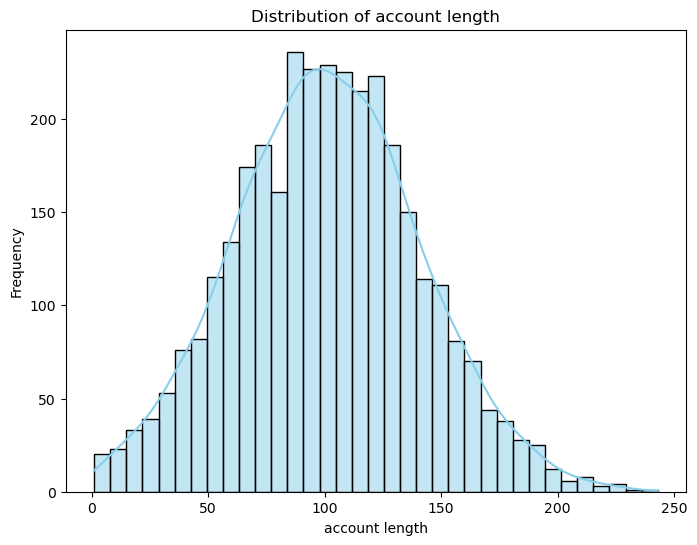

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


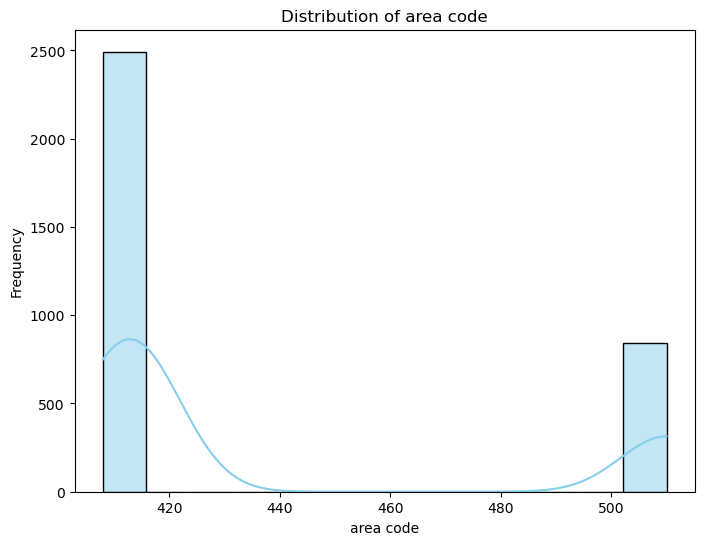

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


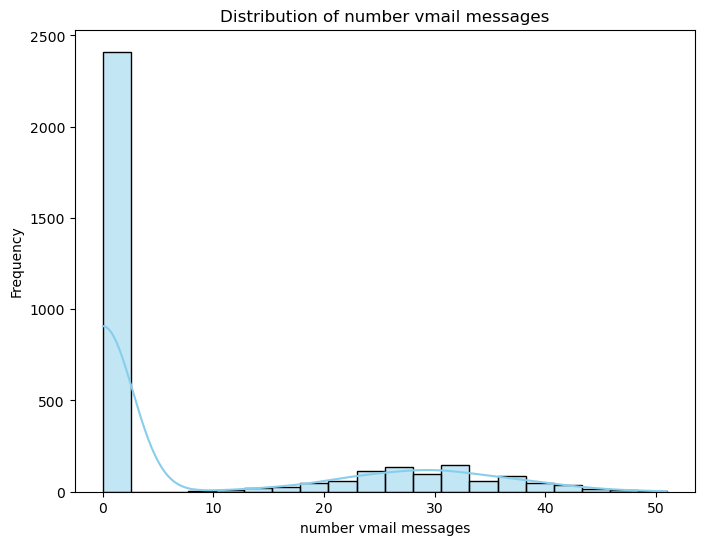

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


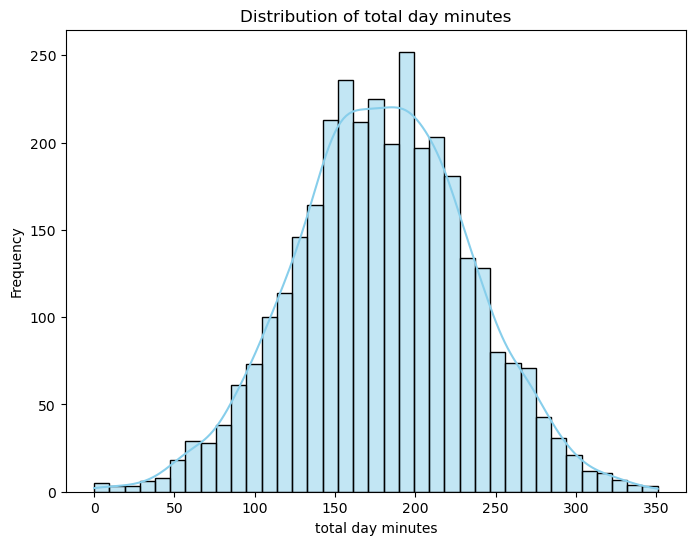

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


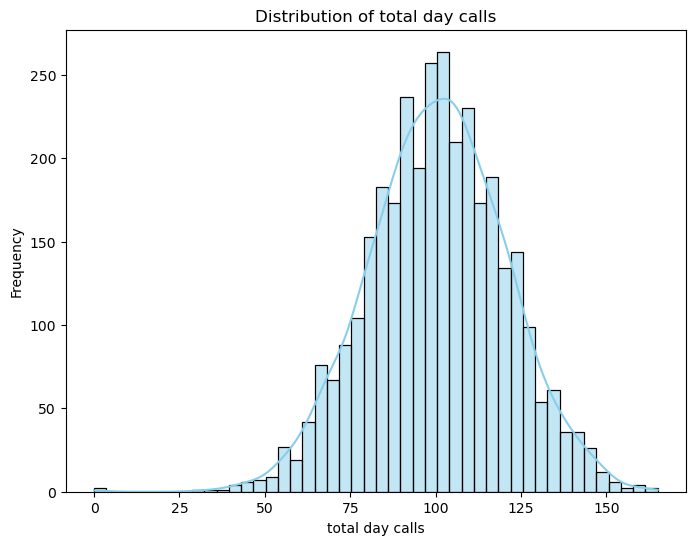

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


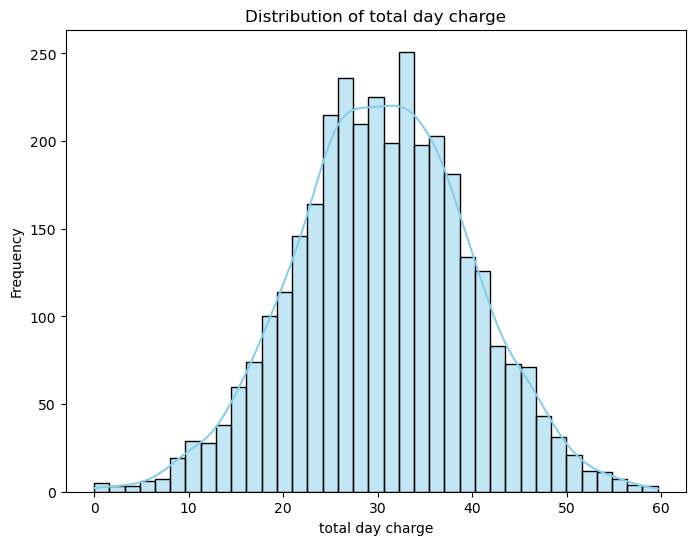

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


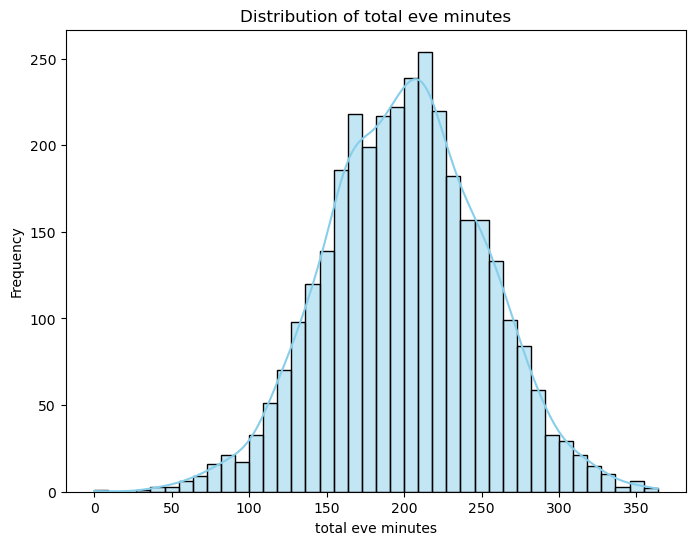

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


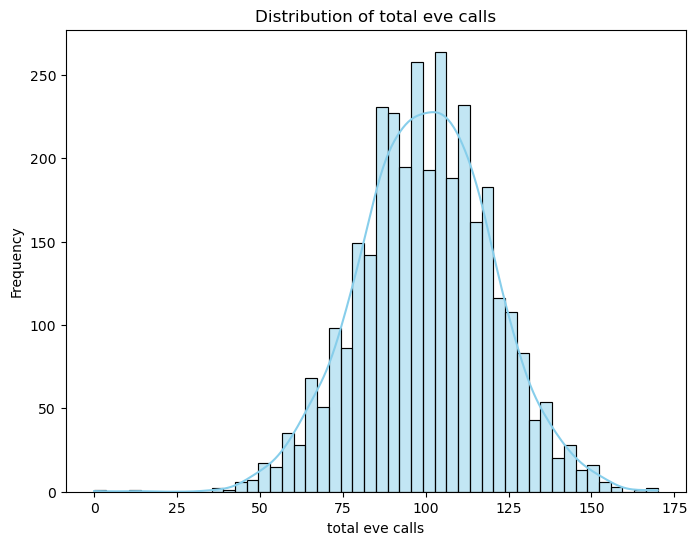

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


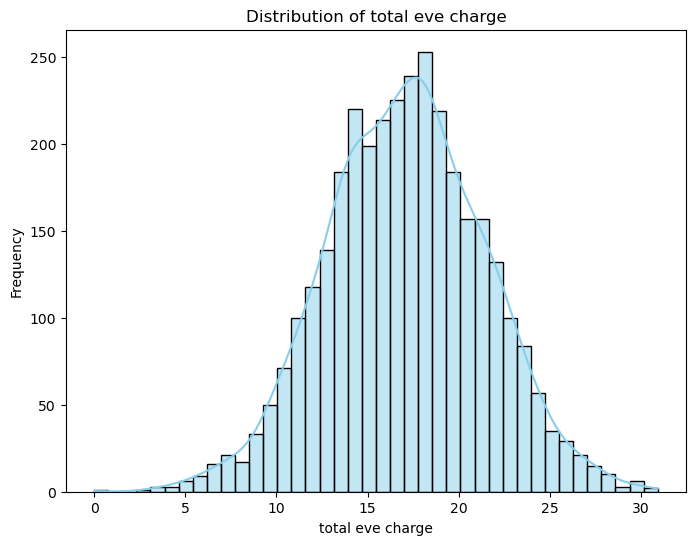

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


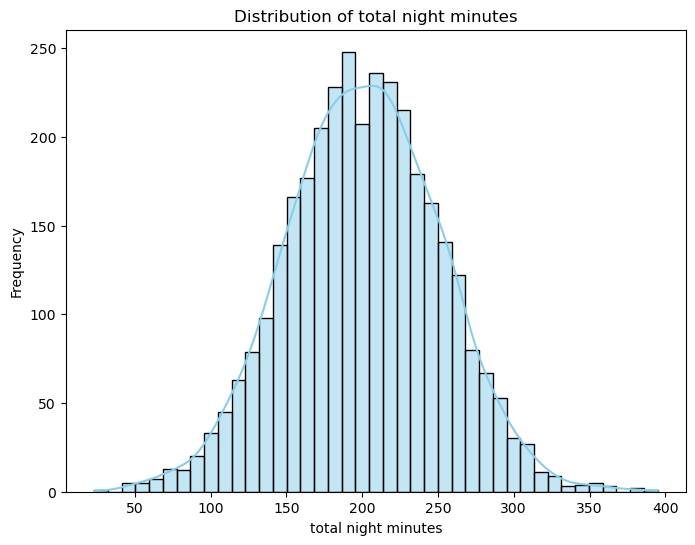

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


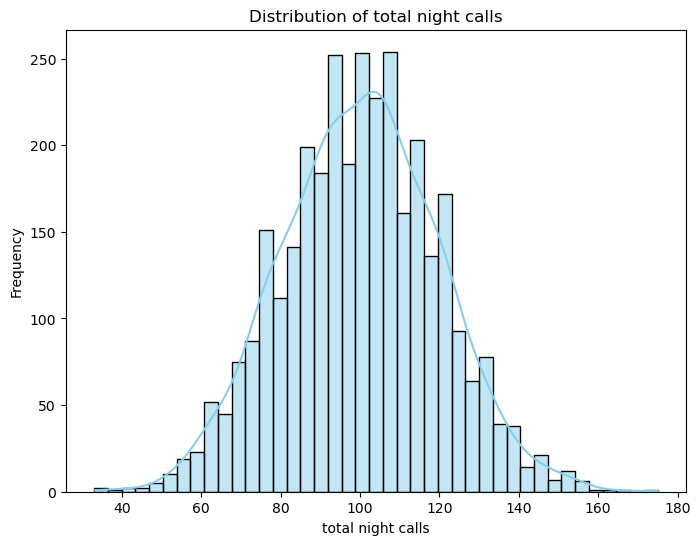

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


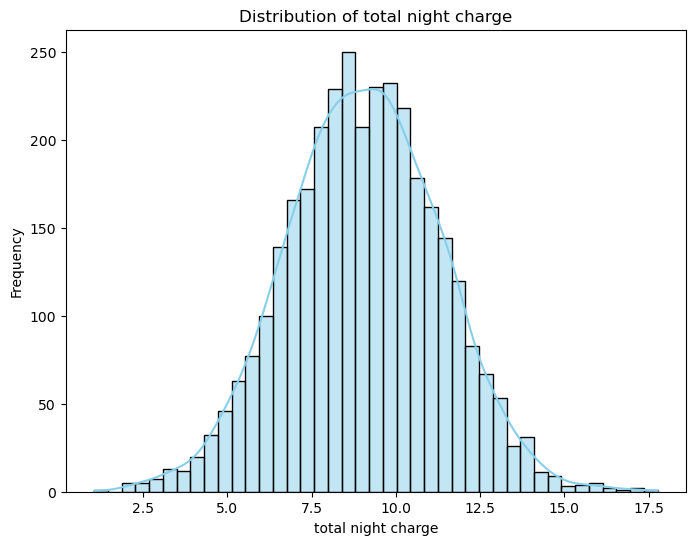

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


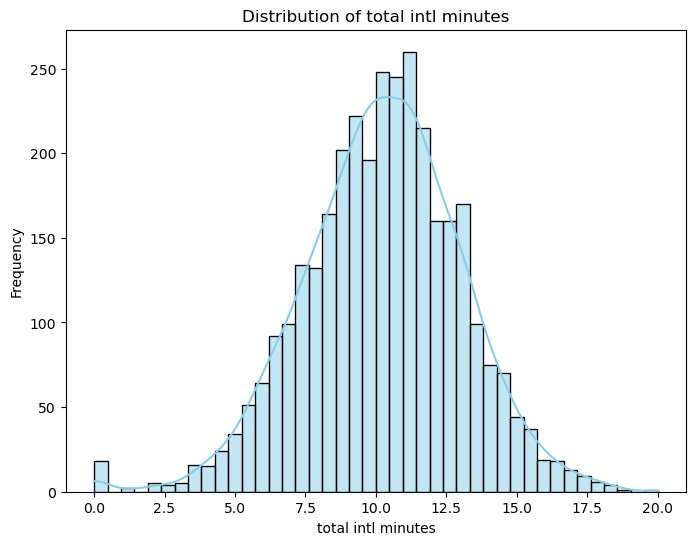

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


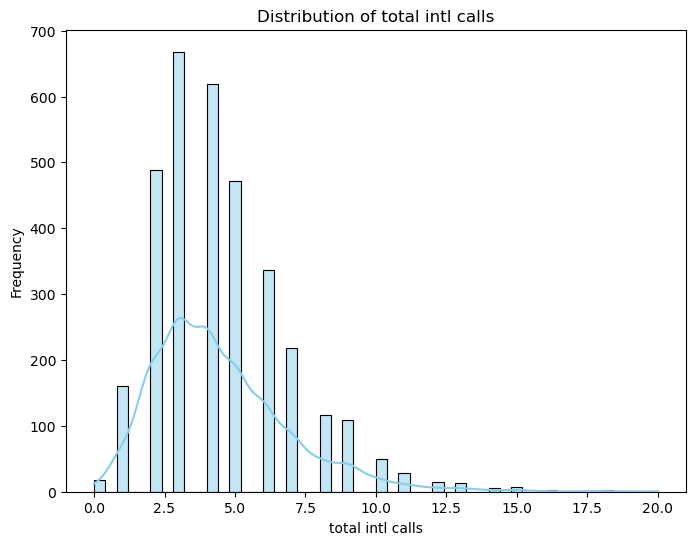

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


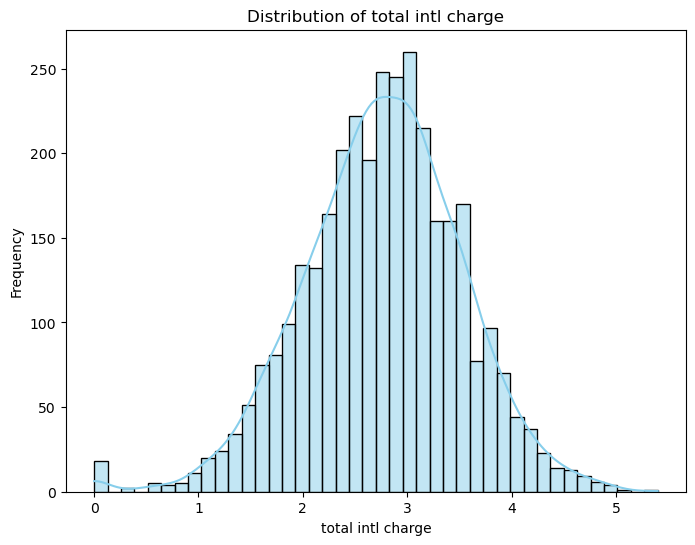

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


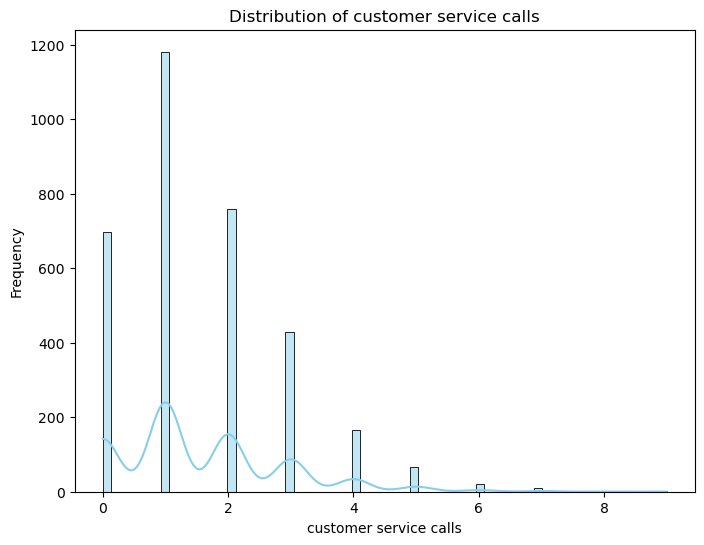

In [9]:
#Visualize the distribution of numerical variables
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Preprocessing

In [10]:
#Drop the 'phone number' column
df = df.drop(columns=['phone number'])

I dropped phone number since it does not affect churn

In [11]:
#List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['state', 'international plan', 'voice mail plan'], dtype='object')

# One-Hot Encoding
Convert categorical variables into a binary format where each category becomes a new binary column (0 or 1). 

In [12]:
#Convert categorical variables into a binary format
#Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(int)

df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265,110,45,197,99,16,244,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161,123,27,195,103,16,254,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243,114,41,121,110,10,162,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299,71,50,61,88,5,196,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166,113,28,148,122,12,186,...,0,0,0,0,0,0,0,0,1,0


[Text(0.5, 1.0, 'correlation matrix of numeric features')]

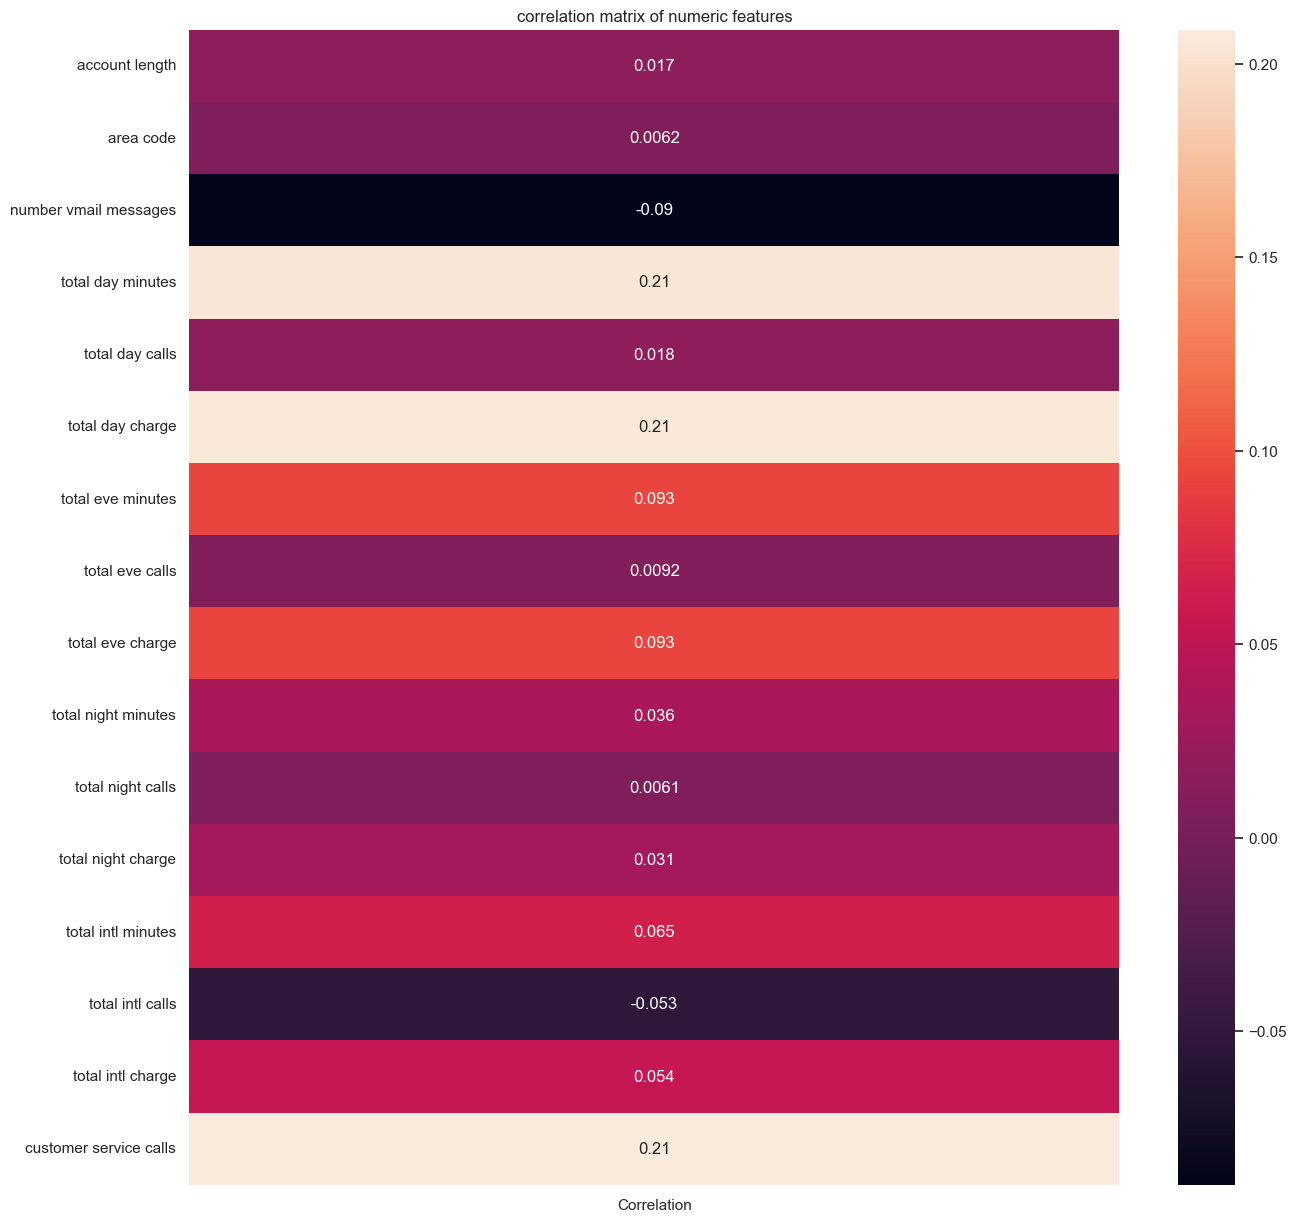

In [13]:
#Calculate correlation matrix of numerical vars 
correlation_matrix = df[numerical_columns].corrwith(df['churn'])

#Create a DataFrame from the correlation matrix
correlation_df = pd.DataFrame({'Correlation': correlation_matrix})

#Plot the heatmap
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(correlation_df, annot=True).set(title='correlation matrix of numeric features')

# Feature Scaling 
Scale numerical features to prevent some features from dominating others during model training

In [14]:
#Initialize StandardScaler
standard_scaler = StandardScaler()

#Scale numerical columns using StandardScaler
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Feature Engineering


In [15]:
#Create a new feature representing the total number of calls made during different time periods
df['total_calls_daytime'] = df['total day calls']
df['total_calls_evening'] = df['total eve calls']
df['total_calls_night'] = df['total night calls']

#Drop the individual call count features
df.drop(['total day calls', 'total eve calls', 'total night calls'], axis=1, inplace=True)
df.head()

,account length,area code,number vmail messages,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,...,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,total_calls_daytime,total_calls_evening,total_calls_night
0,0.676489,-0.523603,1.234883,1.573197,1.612439,-0.069527,-0.135701,0.861862,1.073161,0.073705,...,0,0,0,0,0,0,1,0.476643,-0.055940,-0.465494
1,0.149065,-0.523603,1.307948,-0.336536,-0.331352,-0.108968,-0.135701,1.059638,1.073161,1.143337,...,0,0,0,0,0,0,1,1.124503,0.144867,0.147825
2,0.902529,-0.523603,-0.591760,1.169215,1.180485,-1.568271,-1.526658,-0.759906,-0.672919,0.786793,...,0,0,0,0,0,0,0,0.675985,0.496279,0.198935
3,-0.428590,-0.688834,-0.591760,2.197533,2.152381,-2.751490,-2.685789,-0.087466,-0.236399,-1.352471,...,0,0,0,0,0,1,0,-1.466936,-0.608159,-0.567714
4,-0.654629,-0.523603,-0.591760,-0.244722,-0.223364,-1.035823,-1.063006,-0.285242,-0.236399,0.073705,...,0,0,0,0,0,1,0,0.626149,1.098699,1.067803


# Train Test Split

In [16]:
#Define features (X) and target variable (y)
X = df.drop(columns=['churn'])  
y = df['churn'] 

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection and Evaluation

In [17]:
#Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5) 
#Train the model on the training data
knn.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = knn.predict(X_test)

#Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.881559220389805
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       566
           1       0.89      0.25      0.39       101

    accuracy                           0.88       667
   macro avg       0.89      0.62      0.66       667
weighted avg       0.88      0.88      0.85       667



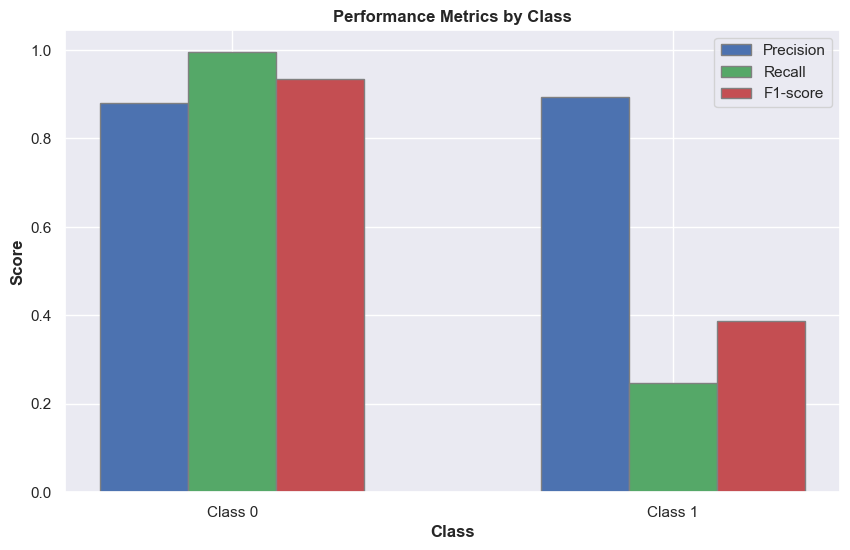

In [18]:
#Compute precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

#Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(precision))], ['Class 0', 'Class 1'])
plt.ylabel('Score', fontweight='bold')
plt.title('Performance Metrics by Class', fontweight='bold')
plt.legend()
plt.show()


The model correctly predicts the class label for about 88.2% of the instances in the testing dataset.
The classification report provides a detailed summary of performance metrics for each class 0(customers not likely to churn) and 1(customers likely to churn), including precision, recall, and F1-score
_Precision_: Precision measures the proportion of true positive predictions among all positive predictions made by the model. In other words, it measures the accuracy of positive predictions. A precision score of 0.88 for class 0 means that 88% of the instances predicted as class 0 were actually class 0. Similarly, a precision score of 0.89 for class 1 means that 89% of the instances predicted as class 1 were actually class 1.

_Recall_: Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It quantifies the ability of the model to correctly identify positive instances. A recall score of 0.99 for class 0 means that 99% of the actual instances of class 0 were correctly classified by the model. Conversely, a recall score of 0.25 for class 1 indicates that only 25% of the actual instances of class 1 were correctly classified.

_F1-score_: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives. A higher F1-score indicates better overall performance. The F1-score for class 0 is 0.93, indicating a good balance between precision and recall, while the F1-score for class 1 is lower at 0.39, reflecting the trade-off between precision and recall for this class.

_Support_: Support represents the number of actual occurrences of each class in the testing dataset. It provides context for interpreting precision, recall, and F1-score metrics.

# Baseline model conclusion
Based on these conclusions, we can infer that the model performs well in accurately predicting instances of the majority class (class 0), but it struggles with identifying instances of the minority class (class 1). Further improvements may be needed to address the imbalance and enhance the model's performance

# Hyperparameter Tuning

In [19]:
#Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

#Initialize KNN classifier
knn = KNeighborsClassifier()

#Initialize GridSearchCV with KNN classifier and parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

#Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

#best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy: 0.8837243782982341


With these parameters, the model achieves an improved accuracy of approximately 88.4% on the training data
We can now retrain the KNN model with the optimal parameters on the entire training dataset and evaluate its performance on the testing dataset

In [20]:
#Initialize KNN classifier with optimal parameters
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean')

#Retrain the model on the entire training dataset
knn.fit(X_train, y_train)

#Make predictions on the testing dataset
y_pred = knn.predict(X_test)

#Calculate accuracy on the testing dataset
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on testing dataset:", accuracy)

Accuracy on testing dataset: 0.8800599700149925


The performance of the model has slightly decreased when evaluated on a separate testing dataset, even after hyperparameter tuning. This could be due to the inherent variability in the data or the specific characteristics of the testing dataset.
Let's experiment with a different classification algorithm, 
# Random Forest

In [21]:
#Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the Random Forest model on the entire training dataset
rf_classifier.fit(X_train, y_train)

#Make predictions on the testing dataset
rf_pred = rf_classifier.predict(X_test)

#Calculate Accuracy, precision, and recall for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Accuracy on testing dataset with Random Forest:", rf_accuracy)
print("Precision on testing dataset with Random Forest:", rf_precision)
print("Recall on testing dataset with Random Forest:", rf_recall)

Accuracy on testing dataset with Random Forest: 0.9325337331334332
Precision on testing dataset with Random Forest: 0.9516129032258065
Recall on testing dataset with Random Forest: 0.5841584158415841


Visualizing these scores

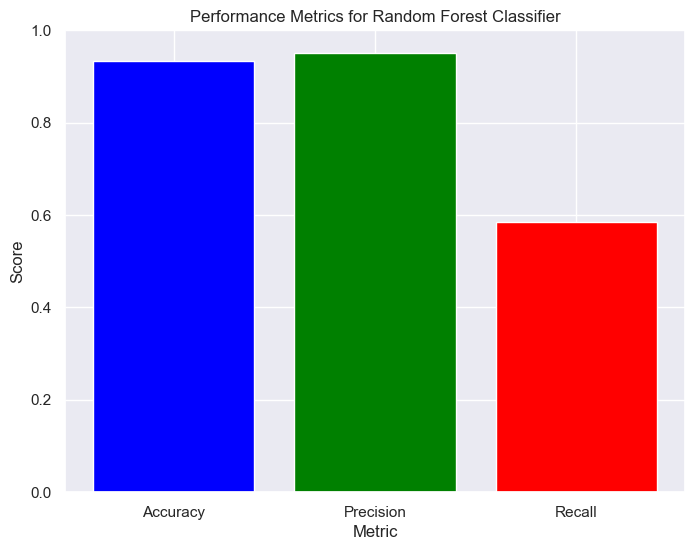

In [22]:
#Define scores
scores = [rf_accuracy, rf_precision, rf_recall]
score_names = ['Accuracy', 'Precision', 'Recall']

#Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(score_names, scores, color=['blue', 'green', 'red'])
plt.title('Performance Metrics for Random Forest Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.show()


The precision score of 0.9516 indicates that 95.16% of the instances predicted as churn were actually churn.

The recall score of 0.5842 means that the model correctly identified 58.42% of the actual churn instances.

The Random Forest classifier achieves a higher accuracy of 93%, indicating that it effectively discriminates between churn and non-churn instances. However, the recall score suggests that there is room for improvement in correctly identifying all churn instances. Let's use 
# XGBoost

In [23]:
#Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

#Train the XGBoost model on the entire training dataset
xgb_classifier.fit(X_train, y_train)

#Make predictions on the training and test sets
xgb_train_pred = xgb_classifier.predict(X_train)
xgb_test_pred = xgb_classifier.predict(X_test)

#Calculate accuracy on the training and test sets
training_accuracy = accuracy_score(y_train, xgb_train_pred)
test_accuracy = accuracy_score(y_test, xgb_test_pred)

print("Accuracy on training dataset with XGBoost:", training_accuracy)
print("Accuracy on testing dataset with XGBoost:", test_accuracy)

Accuracy on training dataset with XGBoost: 1.0
Accuracy on testing dataset with XGBoost: 0.9565217391304348


The model had a somewhat lackluster performance on the test set compared to the training set, suggesting the model is beginning to overfit to the training data. Let's tune the model to increase the model performance and prevent overfitting by 
# Regularization

In [24]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

#Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

#Perform grid search
grid_search.fit(X_train, y_train)

#Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
Best Accuracy: 0.9523627829190996


Let's now retrain the XGBoost classifier using these best parameters on the entire training dataset and evaluate its performance on the testing dataset

In [25]:
#Initialize XGBoost classifier with best parameters
xgb_classifier_tuned = XGBClassifier(objective='binary:logistic', 
                                      learning_rate=0.1, 
                                      max_depth=6, 
                                      min_child_weight=1, 
                                      subsample=0.7, 
                                      n_estimators=100,
                                      random_state=42)

#Train the tuned XGBoost model on the entire training dataset
xgb_classifier_tuned.fit(X_train, y_train)

#Obtain predictions for the training and testing dataset
training_preds = xgb_classifier_tuned.predict(X_train)
test_preds = xgb_classifier_tuned.predict(X_test)

# Calculate accuracy for the training and testing dataset
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Accuracy on training dataset:", training_accuracy)
print("Accuracy on testing dataset:", test_accuracy)


Accuracy on training dataset: 0.9846211552888222
Accuracy on testing dataset: 0.9580209895052474


The XGBoost tuned model performs quite well on both the training and testing datasets, with an accuracy of approximately 98.46% on the training dataset and 95.80% on the testing dataset.
Having high accuracy on both datasets suggests that the model generalizes well to unseen data, indicating that it has learned meaningful patterns from the training data and can make accurate predictions on new data points. Visualizing the other evaluation metrics such as precision, recall of the tuned model. 

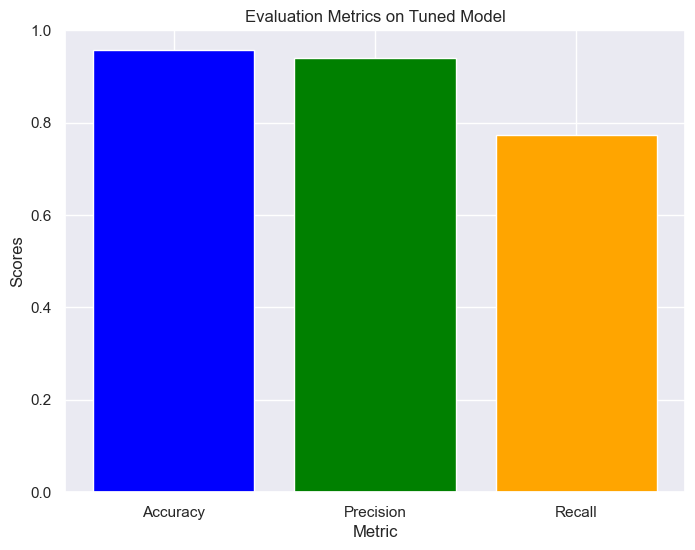

In [26]:
#metrics performance of the tuned model
accuracy_tuned = accuracy_score(y_test, test_preds)
precision_tuned = precision_score(y_test, test_preds)
recall_tuned = recall_score(y_test, test_preds)

metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy_tuned, precision_tuned, recall_tuned]

#Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Evaluation Metrics on Tuned Model')
plt.xlabel('Metric')
plt.ylabel('Scores')
plt.ylim(0, 1)  
plt.show()


# Conclusion
We have successfully improved the Recall value therefore an improvement in correctly identifying all churn instances. The final tuned model does incredibly well in its ability to correctly classify positive and negative instances and balance between false positives and false negatives.